In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from dateutil import parser
from matplotlib import pyplot as plt

In [14]:
users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
user_engagement = pd.read_csv('takehome_user_engagement.csv')

In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [15]:
# creating a list of users with more than 3 visits
user_id_counts = user_engagement.user_id.value_counts() >= 3
potential_adopted_users = [user_id for user_id in user_id_counts.index if user_id_counts[user_id] == True]

In [16]:
# creating a list of users with more than 3 visits in last 7 days
adopted_users = []
for user in potential_adopted_users:
    user_dates = user_engagement[user_engagement.user_id == user].time_stamp.tolist()
    user_dates = [parser.parse(date) for date in user_dates]

    queue = user_dates[0:3]
    adopted = False
    cur_index = 2

    while adopted == False:
        if ((queue[-1] - queue[0]).days <= 7):
            adopted = True
        else:
            try:
                cur_index += 1
                queue.pop(0)
                queue.append(user_dates[cur_index])
            except:
                break

    if adopted == True:
        adopted_users.append(user)

In [19]:
len(adopted_users)

1656

In [20]:
#creating a column to indicate if user is adopted
def adopted_function(x, adopted_users_list):
    if x in adopted_users_list:
        return True
    else:
        return False

users['adopted'] = users['object_id'].apply(lambda x: adopted_function(x, adopted_users))

In [21]:
users.adopted.value_counts()

False    10344
True      1656
Name: adopted, dtype: int64

In [23]:
sns.set_style('darkgrid')

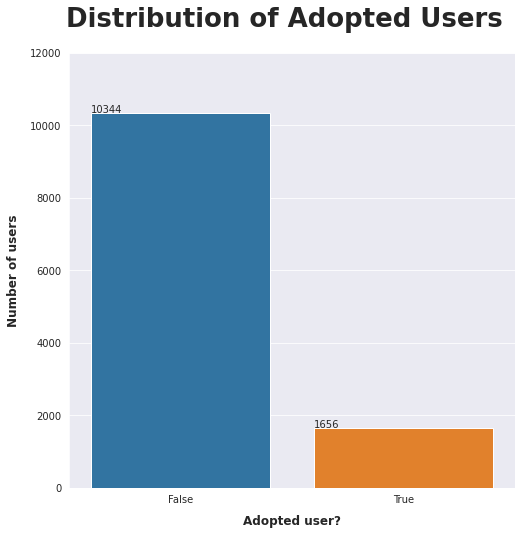

In [24]:
fig,ax1 = plt.subplots(figsize=(8, 8))

sns.countplot(x=users.adopted, ax=ax1)

# set titles
plt.suptitle('Distribution of Adopted Users', fontsize=26, y=0.96, fontweight='bold')
ax1.set_ylabel('Number of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

ax1.set_ylim(0,12000) # set ylim

for p in ax1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

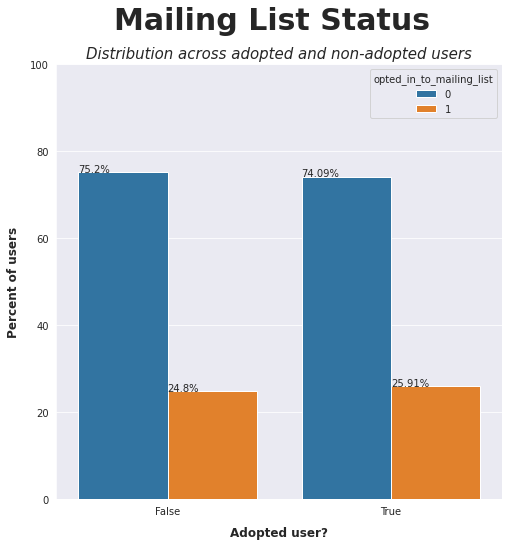

In [25]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'opted_in_to_mailing_list'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Mailing List Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)

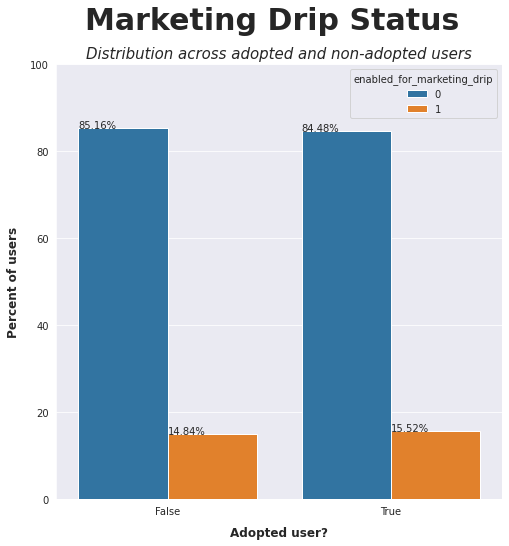

In [26]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'enabled_for_marketing_drip'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,100)
plt.suptitle('Marketing Drip Status', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)


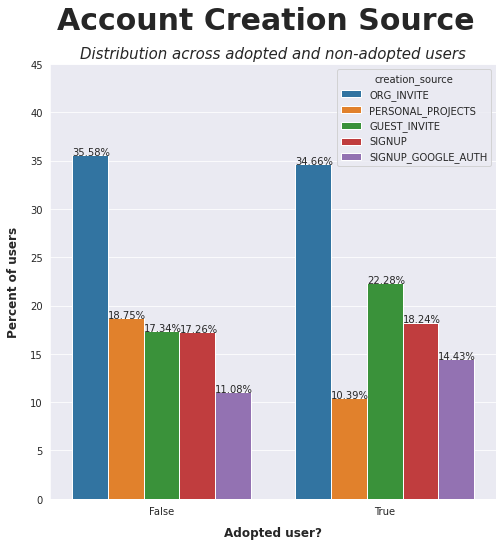

In [27]:
fig,ax1 = plt.subplots(figsize=(8, 8))

x, y = 'adopted', 'creation_source'

# group df to properly show percentage
viz_df = (users
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

sns.barplot(x=x, y='percent', hue=y, data=viz_df, ax=ax1)

# set titles
ax1.set_ylim(0,45)
plt.suptitle('Account Creation Source', fontsize=30, y=0.98, fontweight='bold')
plt.title('Distribution across adopted and non-adopted users', fontsize=15, style='italic')
ax1.set_ylabel('Percent of users', labelpad=10, fontsize=12, fontweight='bold')
ax1.set_xlabel('Adopted user?', labelpad=10,fontsize=12, fontweight='bold')

for p in ax1.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax1.text(txt_x,txt_y,txt)